Прва лабораториска вежба по предметот Податочно рударство

Изработиле: Јана Митровска (181080) и Бојан Петрушевски (162012)

Податочно множество:https://www.kaggle.com/shivamb/netflix-shows?fbclid=IwAR3RCykh-quPVzPLlD2RgxkjVsnwgCZcNu9Va6O9Vp1j7S5gP77AFEiC044

Тема: EDA

# **Reading the dataset**

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/netflix_titles.csv')

In [17]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [18]:
data.describe

<bound method NDFrame.describe of      show_id  ...                                        description
0         s1  ...  In a future where the elite inhabit an island ...
1         s2  ...  After a devastating earthquake hits Mexico Cit...
2         s3  ...  When an army recruit is found dead, his fellow...
3         s4  ...  In a postapocalyptic world, rag-doll robots hi...
4         s5  ...  A brilliant group of students become card-coun...
...      ...  ...                                                ...
7782   s7783  ...  When Lebanon's Civil War deprives Zozo of his ...
7783   s7784  ...  A scrappy but poor boy worms his way into a ty...
7784   s7785  ...  In this documentary, South African rapper Nast...
7785   s7786  ...  Dessert wizard Adriano Zumbo looks for the nex...
7786   s7787  ...  This documentary delves into the mystique behi...

[7787 rows x 12 columns]>

In [19]:
data['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

# **Cleaning data and Missing values**

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [21]:
#replacing null values with UR (unrated)
data['rating'] = data['rating'].fillna('UR')
data['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'UR', 'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV'], dtype=object)

In [22]:
data['director'] = data['director'].fillna('Unknown')
data['director'] = [countries[0] for countries in data['director'].str.split(',')]
data['director'].unique()

array(['Unknown', 'Jorge Michel Grau', 'Gilbert Chan', ...,
       'Peter Hewitt', 'Josef Fares', 'Mozez Singh'], dtype=object)

In [23]:
data['country'] = data['country'].fillna('Unknown')
data['country'] = [countries[0] for countries in data['country'].str.split(',')]
data['country'].unique()

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland', 'Thailand', 'Nigeria', 'Unknown',
       'Norway', 'United Kingdom', 'Japan', 'South Korea', 'Italy',
       'Canada', 'Indonesia', 'Romania', 'Spain', 'Iceland',
       'South Africa', 'France', 'Portugal', 'Hong Kong', 'Argentina',
       'Germany', 'Denmark', 'Kenya', 'New Zealand', 'Pakistan',
       'Australia', 'China', 'Taiwan', 'Netherlands', 'Philippines',
       'United Arab Emirates', 'Iran', 'Israel', 'Uruguay', 'Bulgaria',
       'Mauritius', 'Lebanon', 'Colombia', 'Soviet Union', 'Sweden',
       'Malaysia', 'Ireland', 'Serbia', 'Finland', 'Peru', 'Chile',
       'Ghana', 'Saudi Arabia', 'Namibia', 'Russia', 'Belgium', 'Vietnam',
       'Kuwait', 'Czech Republic', 'Zimbabwe', 'Hungary', 'Venezuela',
       'Cambodia', 'Austria', 'West Germany', 'Slovenia', 'Switzerland',
       'Jordan', 'Bangladesh', 'Georgia', 'Puerto Rico', 'Senegal',
       'Guatemala', 'Ukraine', 'Ja

In [24]:
data['duration'] = [int(duration[0]) for duration in data['duration'].str.split(' ')]
data['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7787, dtype: int64

In [25]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,Dramas,A brilliant group of students become card-coun...


In [26]:
data.to_csv('netflix.csv')

# **Visualizations**

In [27]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.pie(values=data['type'].value_counts(), 
             names=data['type'].value_counts().index, 
             title='Number total of TV-Shows and Movies in Netflix')
fig.show()

In [28]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.pie(values=data['rating'].value_counts(), 
             names=data['rating'].value_counts().index, 
             title='Rating of TV-Shows and Movies in Netflix')
fig.show()

In [29]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

order_rating = ['TV-Y', 'TV-Y7', 'TV-Y7-FV', 'G', 'TV-G', 'PG', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 
               'TV-MA', 'NR']


fig = px.bar(y = data['rating'].value_counts(), 
             x = data['rating'].value_counts().index,
             labels = dict(x="Rating", y="Total Number"),
             title = 'Rating of TV-Shows and Movies in Netflix'
            )

fig.update_xaxes(categoryorder = 'array', categoryarray= order_rating)

fig.show()

In [30]:
fig = px.bar(x = data[data['type']=='TV Show']['duration'].value_counts().index, 
             y = data[data['type']=='TV Show']['duration'].value_counts())

fig.update_layout(
    title='Duration of TV Shows',
    xaxis_title="Duration (seasons)",
    yaxis_title="Total number",
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1)
)

fig.show()

In [31]:
fig = px.histogram(data[data['type']=='Movie'], x="duration")

fig.update_layout(
    title='Duration of movies',
    xaxis_title="Duration (min)",
    yaxis_title="Count",
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 15),
)

fig.update_traces(
    xbins = dict( # bins used for histogram
        start = 0,
        end = 315,
        size = 15)
    )
fig.show()

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

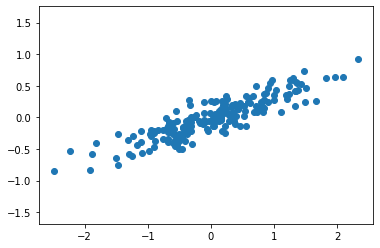

In [32]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_)
print(pca.explained_variance_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


[[-0.94446029 -0.32862557]]
[0.7625315]


(-2.7190988093884965,
 2.6093276252889543,
 -0.9618533270308598,
 0.8921761150844829)

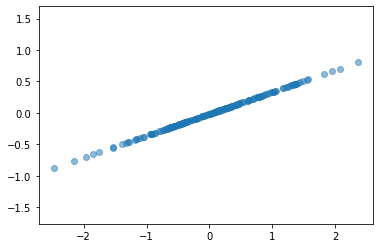

In [34]:
pca = PCA(n_components=1)
pca.fit(X)

print(pca.components_)
print(pca.explained_variance_)

X_pca = pca.transform(X)

X_new = pca.inverse_transform(X_pca)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.5)
plt.axis('equal')